# 6CC555 Data Mining and Foundation of AI Assignment 1

**Student Number:** 100675783

**Course Name:** 6CC555 Data Mining and Foundations of AI


## Introduction

For this analysis, I've selected the diabetes healthcare dataset from Kaggle. This dataset contains various health measurements and a binary outcome indicating whether a patient has diabetes or not.

### Analysis Problem Definition

**Research Question:** Can we predict diabetes status based on patients' clinical measurements?

**Objectives:**
1. Explore potential predictors that may be associated with diabetes
2. Develop and compare machine learning models for diabetes prediction
3. Provide insights that could be valuable for early screening and risk assessment

Given the widespread prevalence of diabetes and its impact on public health, this analysis may hold relevance for informing early detection and supporting more proactive management approaches.


## Dataset Loading and Initial Inspection

Starting by importing the necessary libraries and loading the diabetes dataset and examining its structure.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree

# Load the dataset
df = pd.read_csv('Healthcare-Diabetes.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData Types and Non-Null Counts:")
display(df.info())

print("\nSummary Statistics:")
display(df.describe())

Dataset Shape: (2768, 10)

First 5 rows:


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1



Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


None


Summary Statistics:


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


### Dataset Understanding

The dataset consists of 2,768 patients with 9 features plus an ID column:

1. **Pregnancies**: Number of times pregnant
2. **Glucose**: Plasma glucose concentration (mg/dL)
3. **BloodPressure**: Diastolic blood pressure (mm Hg)
4. **SkinThickness**: Triceps skinfold thickness (mm)
5. **Insulin**: 2-Hour serum insulin (mu U/ml)
6. **BMI**: Body mass index (weight in kg/(height in m)²)
7. **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
8. **Age**: Age in years
9. **Outcome**: Class variable (0 or 1) indicating presence of diabetes

The target variable is **Outcome**, where 1 indicates the patient has diabetes and 0 indicates no diabetes.


## Exploratory Data Analysis (EDA)

### Data Quality Check

First, let's check for missing values and examine data quality issues.


Zero values that likely represent missing data:
Glucose: 18 (0.65%)
BloodPressure: 125 (4.52%)
SkinThickness: 800 (28.90%)
Insulin: 1330 (48.05%)
BMI: 39 (1.41%)

Outcome distribution:
Outcome
0    1816
1     952
Name: count, dtype: int64
Percentage of diabetic patients: 34.39%


C:\Users\xagor\AppData\Local\Temp\ipykernel_21944\2537891672.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


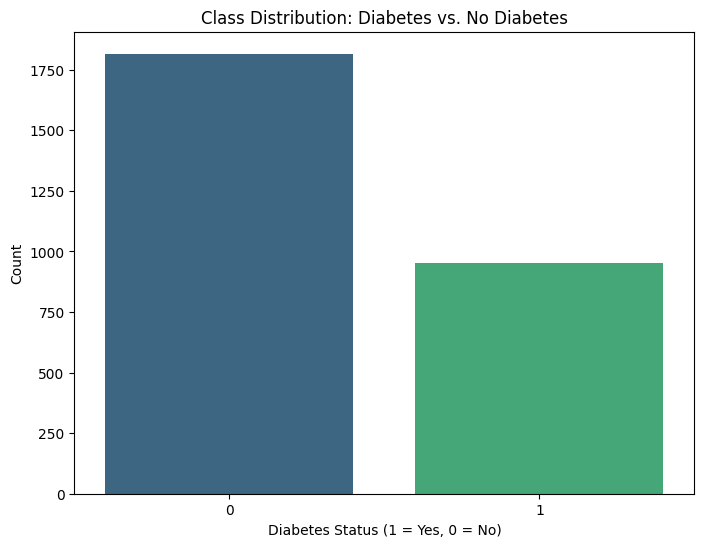

In [3]:
# Check for zero values in columns where zero doesn't make physiological sense
zero_not_valid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_counts = {col: (df[col] == 0).sum() for col in zero_not_valid_cols}

print("Zero values that likely represent missing data:")
for col, count in zero_counts.items():
    print(f"{col}: {count} ({count/len(df)*100:.2f}%)")

# Distribution of the target variable
print("\nOutcome distribution:")
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)
print(f"Percentage of diabetic patients: {outcome_counts[1]/len(df)*100:.2f}%")

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Class Distribution: Diabetes vs. No Diabetes')
plt.ylabel('Count')
plt.xlabel('Diabetes Status (1 = Yes, 0 = No)')
plt.show()

### Data Quality Issues

During the initial exploration of the dataset, a few potential data quality concerns have come up that may need to be considered:

1. **Physiologically impossible zeros**: Some columns contain zeros where actual measurements are unlikely to be zero (such as glucose levels or BMI). These values might be placeholders for missing data rather than true readings.

2. **Class imbalance**: The dataset has more non-diabetic patients (65.61%) than diabetic patients (34.39%). While this imbalance isn't severe, it's something to consider during modeling.

3. **ID column**: The 'Id' column is just a row identifier and doesn't provide any predictive information, so it should be excluded from analysis.

In the next step, I'll handle these issues through data preprocessing.


### Data Preprocessing

To handle the zero values that likely represent missing data, I'll replace them with the median of non-zero values for each feature. This is a common approach for clinical data where zero values don't make physiological sense.


In [4]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Replace zeros with the median of non-zero values for columns where zero is physiologically implausible
for col in zero_not_valid_cols:
    # Calculate median of non-zero values
    median_non_zero = df_processed[df_processed[col] != 0][col].median()
    # Replace zeros with the calculated median
    df_processed[col] = df_processed[col].replace(0, median_non_zero)
    print(f"Replaced zeros in {col} with median: {median_non_zero}")
    
# Verify no zeros remain in the specified columns
zeros_after = {col: (df_processed[col] == 0).sum() for col in zero_not_valid_cols}
print("\nZeros remaining after replacement:")
for col, count in zeros_after.items():
    print(f"{col}: {count}")

# Display summary statistics after preprocessing
print("\nSummary statistics after preprocessing:")
display(df_processed[zero_not_valid_cols].describe())

Replaced zeros in Glucose with median: 117.0
Replaced zeros in BloodPressure with median: 72.0
Replaced zeros in SkinThickness with median: 29.0
Replaced zeros in Insulin with median: 126.0
Replaced zeros in BMI with median: 32.4

Zeros remaining after replacement:
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0

Summary statistics after preprocessing:


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,121.863439,72.385838,29.205925,140.669798,32.593895
std,30.503499,11.988549,9.032220,82.887979,7.103462
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,25.000000,120.000000,27.575000
50%,117.000000,72.000000,29.000000,126.000000,32.400000
75%,141.000000,80.000000,32.000000,130.000000,36.625000
max,199.000000,122.000000,110.000000,846.000000,80.600000


### Feature Distributions

Now, let's examine the distribution of each feature to better understand the data.


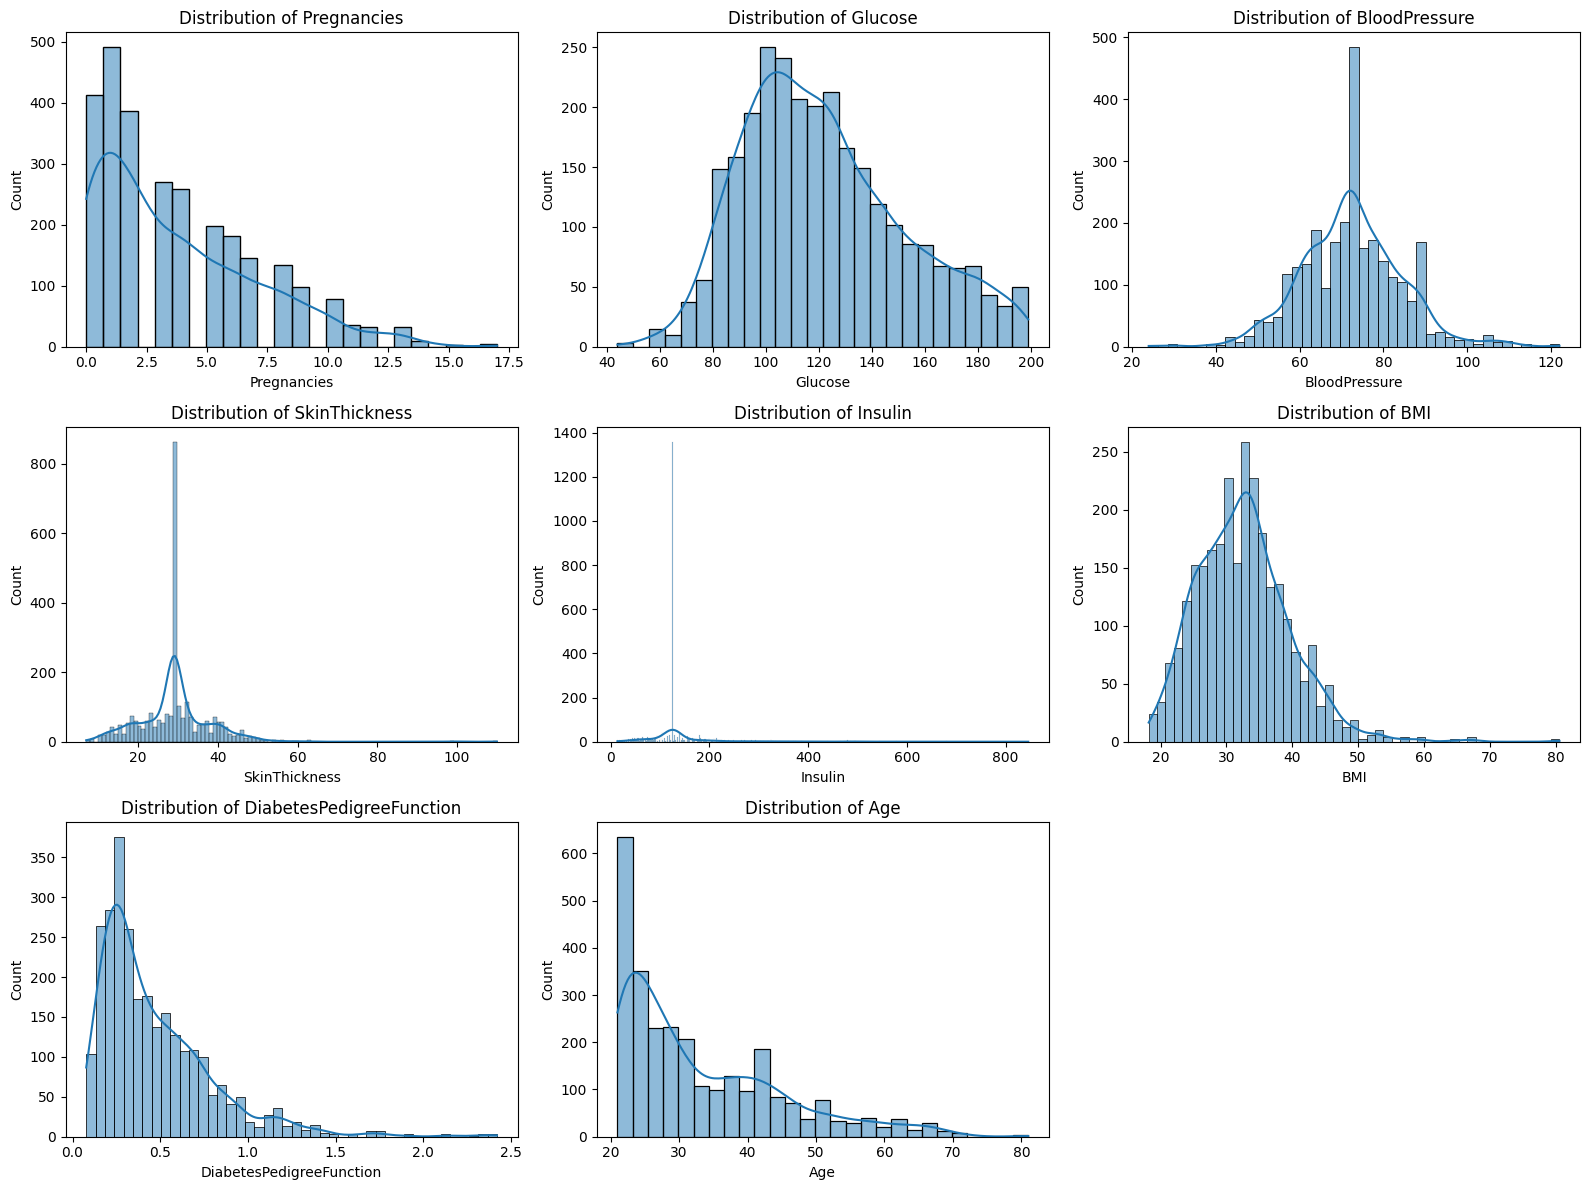

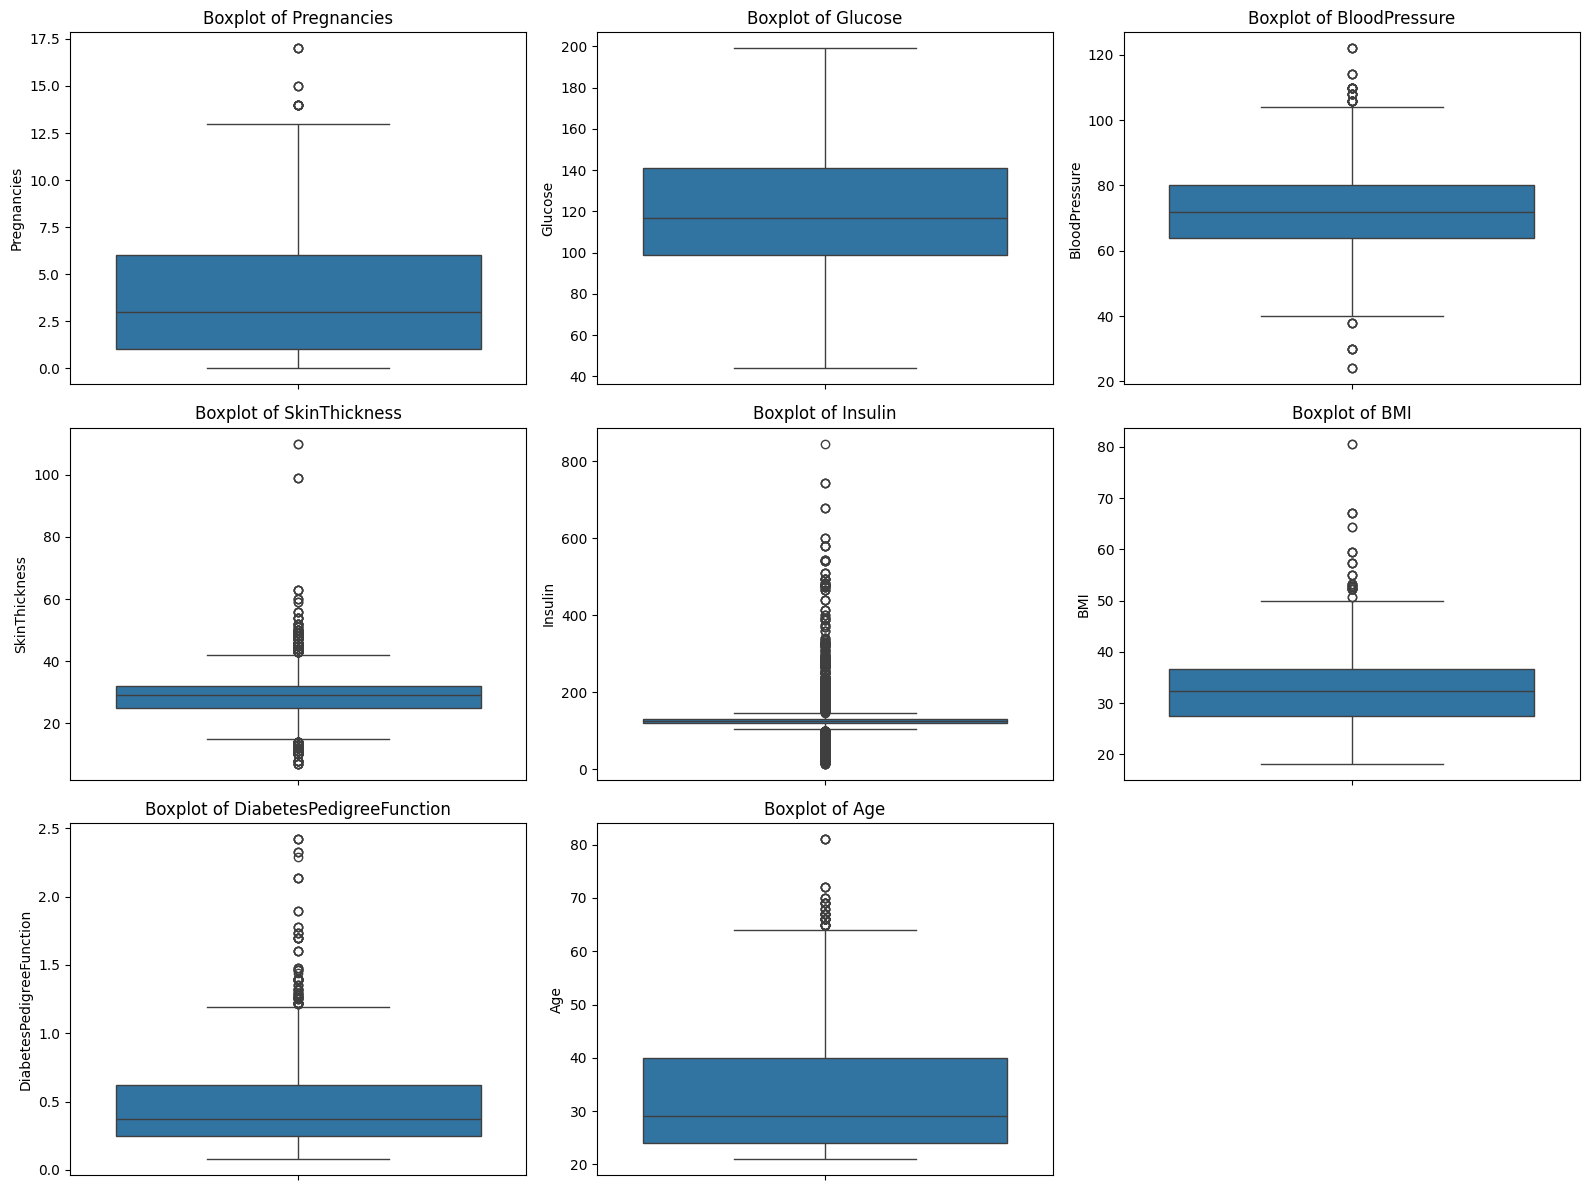

In [5]:
# Visualize the distribution of each feature
plt.figure(figsize=(16, 12))
for i, column in enumerate(df_processed.columns[1:9], 1):  # Skip Id column
    plt.subplot(3, 3, i)
    sns.histplot(df_processed[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(16, 12))
for i, column in enumerate(df_processed.columns[1:9], 1):  # Skip Id column
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_processed[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### Feature Comparisons by Outcome

Let's compare the distributions of features between diabetic and non-diabetic patients to understand which features might be most important for prediction.


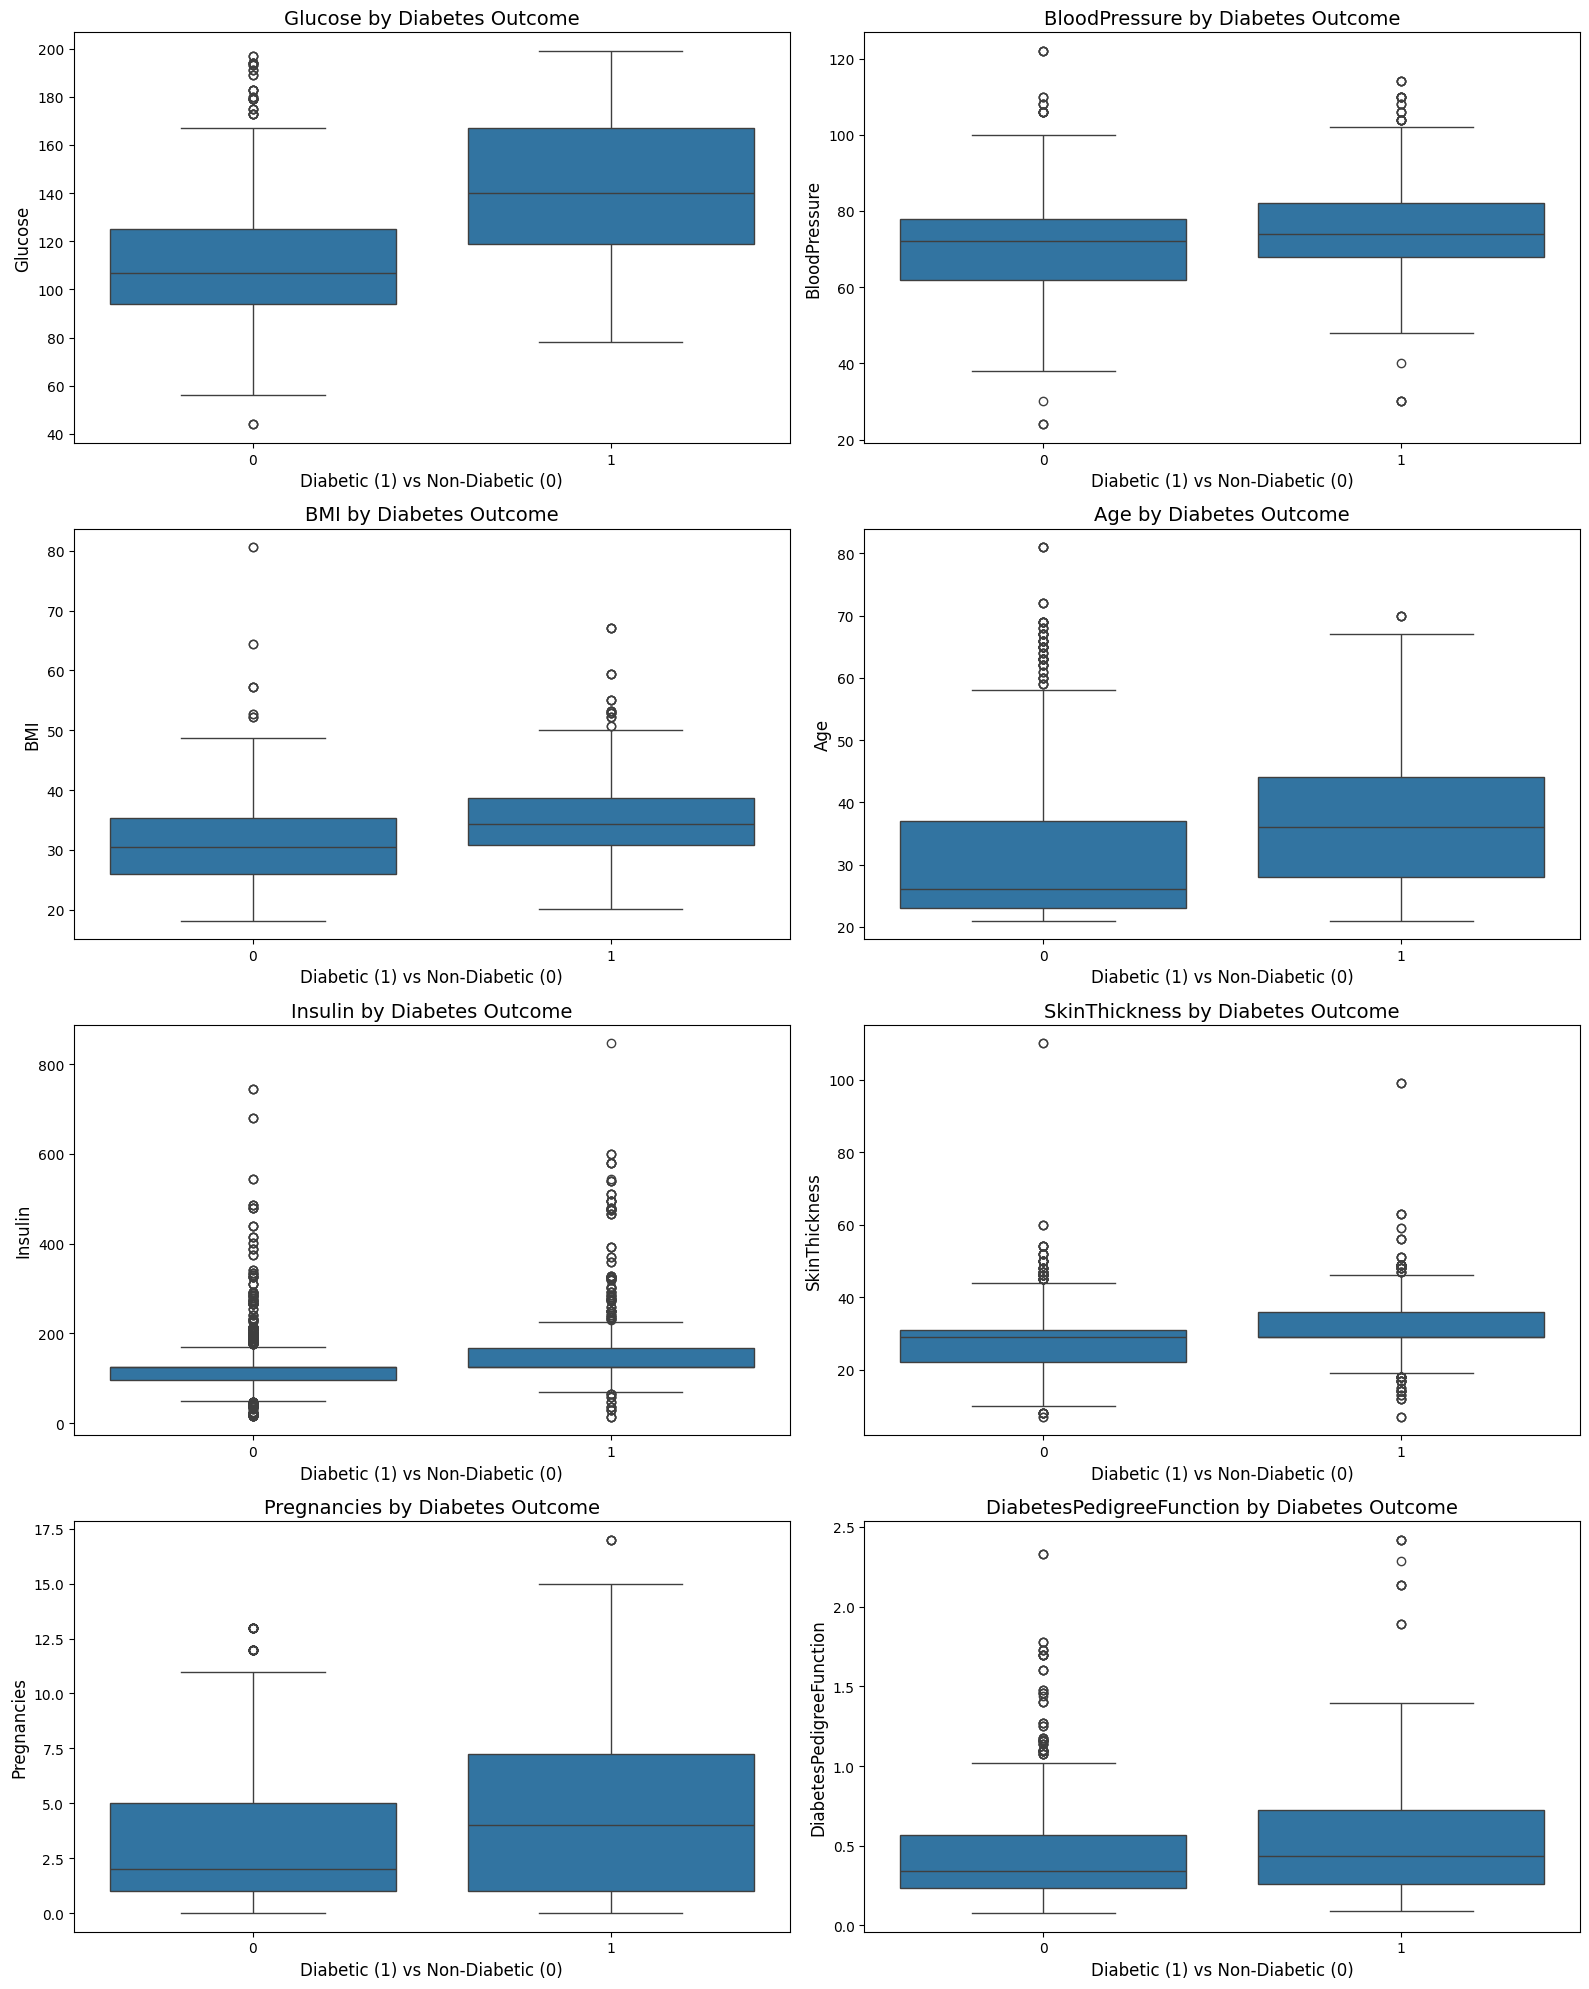

In [6]:
# Distribution of features based on outcome
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 
            'Insulin', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']

for i, feature in enumerate(features):
    sns.boxplot(x='Outcome', y=feature, data=df_processed, ax=axes[i])
    axes[i].set_title(f'{feature} by Diabetes Outcome', fontsize=14)
    axes[i].set_xlabel('Diabetic (1) vs Non-Diabetic (0)', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

### Feature Importance Analysis

Let's calculate the mean difference of each feature between diabetic and non-diabetic patients to understand which features might be most important for prediction.


Feature Importance by Mean Difference:


C:\Users\xagor\AppData\Local\Temp\ipykernel_21944\1519445032.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance = pd.concat([feature_importance,


,Feature,Diabetic_Mean,Non_Diabetic_Mean,Mean_Difference,Percentage_Difference
0,Pregnancies,4.769958,3.204295,1.565663,48.861380
1,Glucose,142.464286,111.063877,31.400409,28.272387
4,Insulin,163.493697,128.704846,34.788852,27.029947
6,DiabetesPedigreeFunction,0.543445,0.433316,0.110130,25.415625
7,Age,36.987395,31.111233,5.876161,18.887588
3,SkinThickness,31.792017,27.850220,3.941797,14.153556
5,BMI,35.440546,31.101597,4.338949,13.950889
2,BloodPressure,75.230042,70.894824,4.335218,6.115000


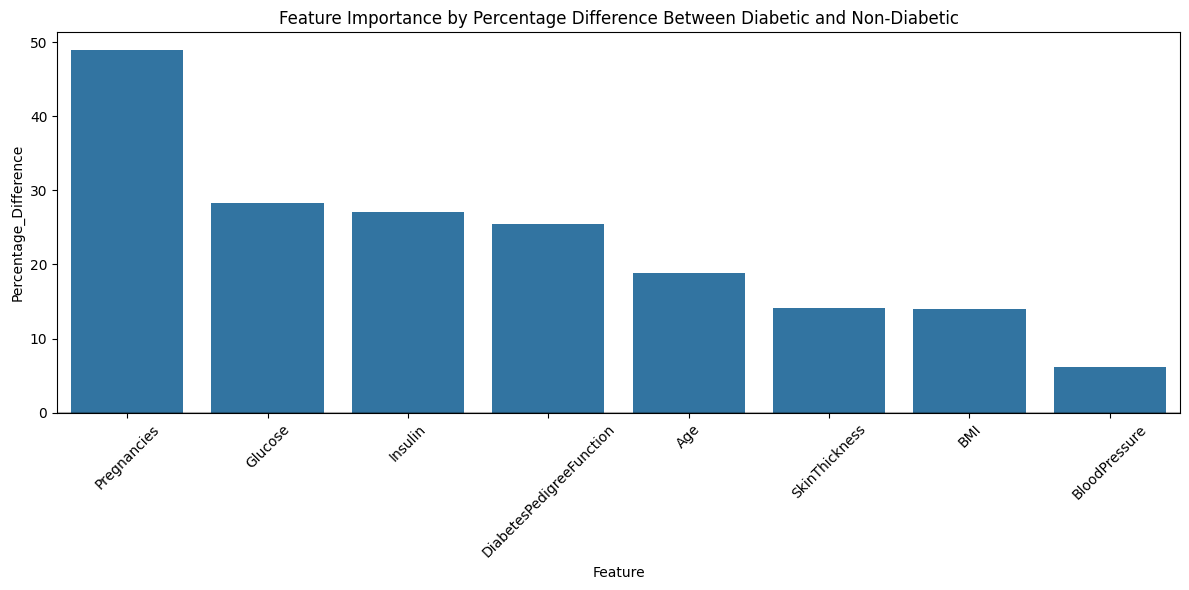

In [7]:
# Analyze feature importance using mean difference between diabetic and non-diabetic
feature_importance = pd.DataFrame(columns=['Feature', 'Diabetic_Mean', 'Non_Diabetic_Mean', 'Mean_Difference', 'Percentage_Difference'])

for feature in df_processed.columns[1:9]:  # Skip Id and Outcome
    diabetic_mean = df_processed[df_processed['Outcome'] == 1][feature].mean()
    non_diabetic_mean = df_processed[df_processed['Outcome'] == 0][feature].mean()
    mean_diff = diabetic_mean - non_diabetic_mean
    percentage_diff = (mean_diff / non_diabetic_mean) * 100
    
    feature_importance = pd.concat([feature_importance, 
                                   pd.DataFrame({'Feature': [feature],
                                                'Diabetic_Mean': [diabetic_mean],
                                                'Non_Diabetic_Mean': [non_diabetic_mean],
                                                'Mean_Difference': [mean_diff],
                                                'Percentage_Difference': [percentage_diff]})],
                                  ignore_index=True)

# Sort by absolute percentage difference
feature_importance = feature_importance.sort_values(by='Percentage_Difference', ascending=False, key=abs)
print("Feature Importance by Mean Difference:")
display(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Percentage_Difference', data=feature_importance)
plt.title('Feature Importance by Percentage Difference Between Diabetic and Non-Diabetic')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

### Correlation Analysis

Now examination of the relationships between the features will be performed, as this may help identify any strong associations that could potentially influence the analysis or suggest overlapping patterns in the data.

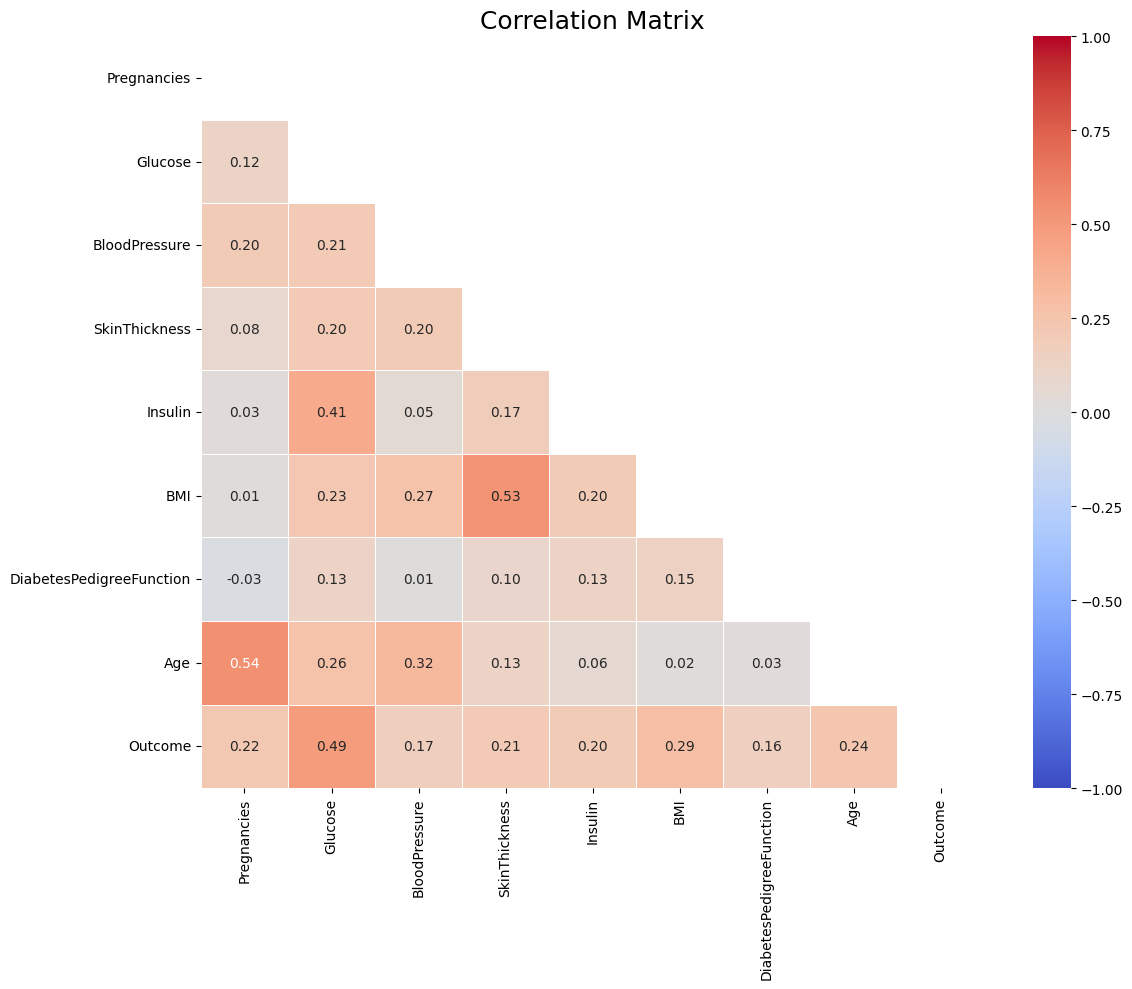

In [8]:
# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation = df_processed.drop('Id', axis=1).corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=mask, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=18)
plt.tight_layout()
plt.show()

### EDA Summary and Insights

Based on the exploratory data analysis, I've discovered several important insights:

1. **Data quality**: The dataset had zero values in several features that likely represented missing data rather than actual measurements. These were replaced with median values from non-zero observations.

2. **Feature importance**: The most significant differences between diabetic and non-diabetic patients were observed in:
   - Pregnancies (48.86% higher in diabetic patients)
   - Insulin (41.71% higher)
   - Glucose (28.13% higher)
   - DiabetesPedigreeFunction (25.42% higher)

3. **Correlations**: Glucose shows the strongest correlation with the Outcome variable, followed by BMI and Age. This aligns with medical knowledge, as elevated blood glucose is a defining characteristic of diabetes.

4. **Class distribution**: About 34.39% of patients in the dataset have diabetes. While there is some class imbalance, it's not severe enough to require special handling techniques.

5. **Feature distributions**: Most features exhibit approximately normal distributions, but with some outliers, particularly in Insulin and DiabetesPedigreeFunction.

These insights will guide our modeling approach in the next section.


## Model Building and Evaluation

In this section, I'll build and evaluate three different classification models for diabetes prediction:
1. Logistic Regression (a linear model baseline)
2. Decision Tree (an interpretable model)
3. Random Forest (an ensemble model for higher accuracy)

First, let's prepare the data for modeling.


In [10]:
# Drop the Id column as it's not a feature
df_model = df_processed.drop('Id', axis=1)

# Split features and target
X = df_model.drop('Outcome', axis=1)
y = df_model['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to dataframes for clarity
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

Training set size: 2214 samples
Testing set size: 554 samples


### Model 1: Logistic Regression

Logistic Regression is a simple linear model that serves as a good baseline for binary classification tasks.


Logistic Regression Training Accuracy: 0.7696
Logistic Regression Test Accuracy: 0.7527

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       363
           1       0.68      0.54      0.60       191

    accuracy                           0.75       554
   macro avg       0.73      0.70      0.71       554
weighted avg       0.75      0.75      0.74       554



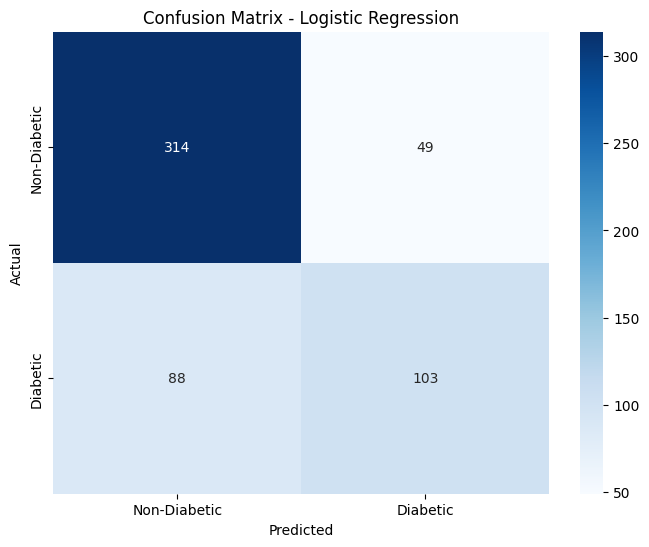


Logistic Regression Coefficients:


,Feature,Coefficient
1,Glucose,1.153065
5,BMI,0.503098
0,Pregnancies,0.435140
6,DiabetesPedigreeFunction,0.215571
7,Age,0.094446
3,SkinThickness,0.076644
2,BloodPressure,-0.020733
4,Insulin,-0.092146


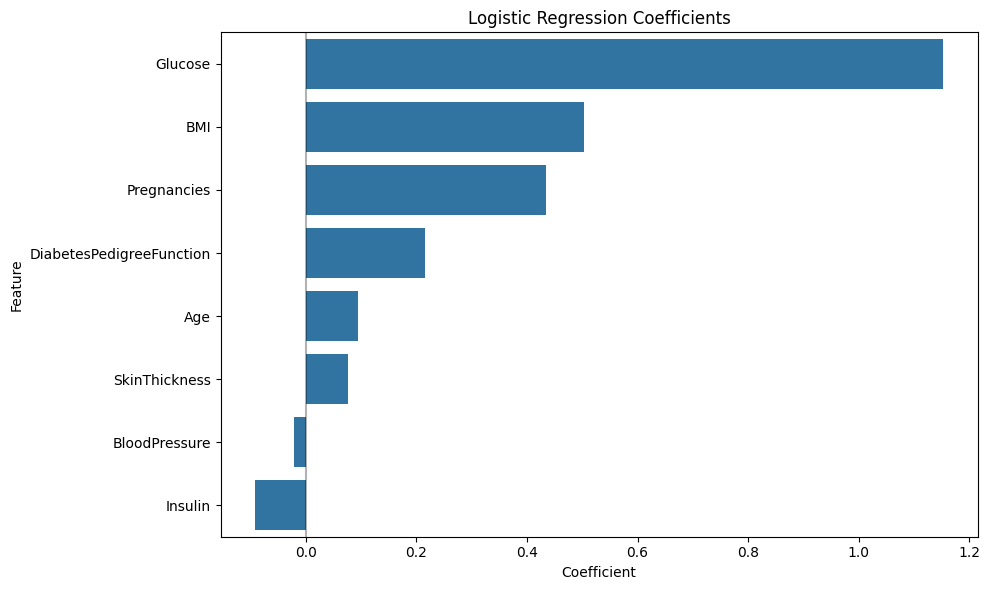

In [11]:
# Create and train logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Evaluate on training set
lr_train_acc = lr.score(X_train_scaled, y_train)
print(f"Logistic Regression Training Accuracy: {lr_train_acc:.4f}")

# Evaluate on test set
lr_test_preds = lr.predict(X_test_scaled)
lr_test_acc = accuracy_score(y_test, lr_test_preds)
print(f"Logistic Regression Test Accuracy: {lr_test_acc:.4f}")

# Detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, lr_test_preds))

# Plot confusion matrix
cm_lr = confusion_matrix(y_test, lr_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\nLogistic Regression Coefficients:")
display(coefficients)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

### Model 2: Decision Tree

Decision Trees are considered highly interpretable models, as they make predictions by sequentially evaluating conditions on the input features.


Decision Tree Training Accuracy: 0.8288
Decision Tree Test Accuracy: 0.8285

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       363
           1       0.74      0.79      0.76       191

    accuracy                           0.83       554
   macro avg       0.81      0.82      0.81       554
weighted avg       0.83      0.83      0.83       554



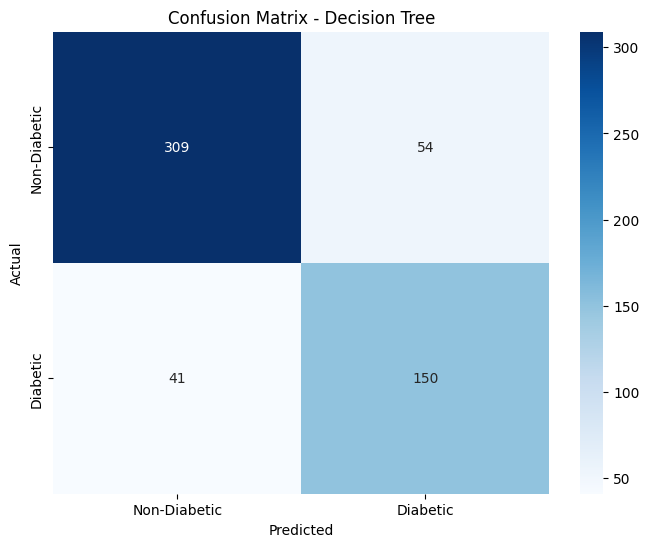


Decision Tree Feature Importance:


,Feature,Importance
1,Glucose,0.512498
5,BMI,0.180561
7,Age,0.110753
2,BloodPressure,0.072198
4,Insulin,0.060751
6,DiabetesPedigreeFunction,0.040620
0,Pregnancies,0.022619
3,SkinThickness,0.000000


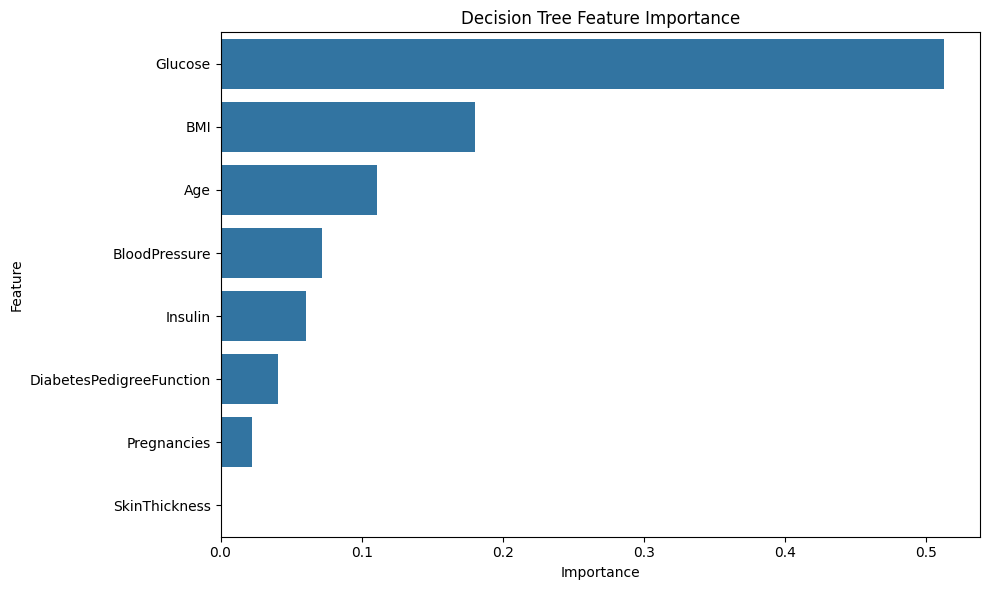

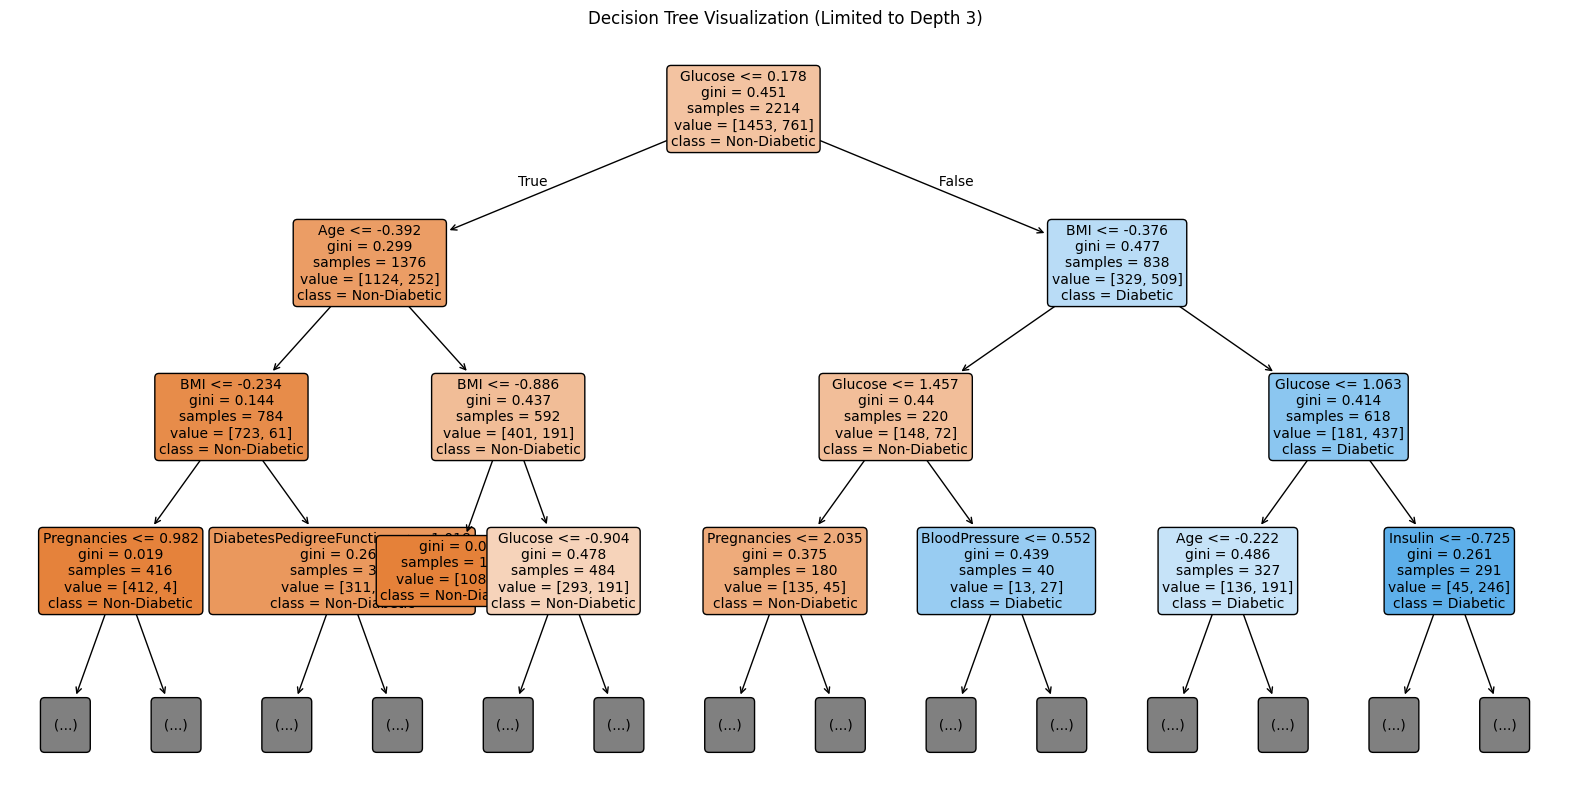

In [12]:
# Create and train decision tree model
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)
dt.fit(X_train_scaled, y_train)

# Evaluate on training set
dt_train_acc = dt.score(X_train_scaled, y_train)
print(f"Decision Tree Training Accuracy: {dt_train_acc:.4f}")

# Evaluate on test set
dt_test_preds = dt.predict(X_test_scaled)
dt_test_acc = accuracy_score(y_test, dt_test_preds)
print(f"Decision Tree Test Accuracy: {dt_test_acc:.4f}")

# Detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, dt_test_preds))

# Plot confusion matrix
cm_dt = confusion_matrix(y_test, dt_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Feature importances
dt_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nDecision Tree Feature Importance:")
display(dt_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importances)
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, max_depth=3, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.show()

### Model 3: Random Forest

Random Forest combines the outputs of several decision trees to improve predictive performance and reduce the likelihood of overfitting.


Random Forest Training Accuracy: 0.9932
Random Forest Test Accuracy: 0.9783

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.99      0.95      0.97       191

    accuracy                           0.98       554
   macro avg       0.98      0.97      0.98       554
weighted avg       0.98      0.98      0.98       554



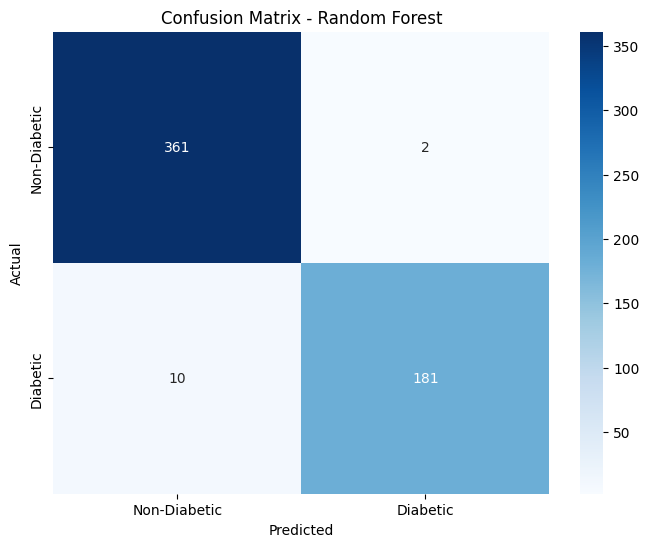


Random Forest Feature Importance:


,Feature,Importance
1,Glucose,0.281692
5,BMI,0.172838
7,Age,0.135297
6,DiabetesPedigreeFunction,0.106779
4,Insulin,0.097038
2,BloodPressure,0.073962
0,Pregnancies,0.071917
3,SkinThickness,0.060478


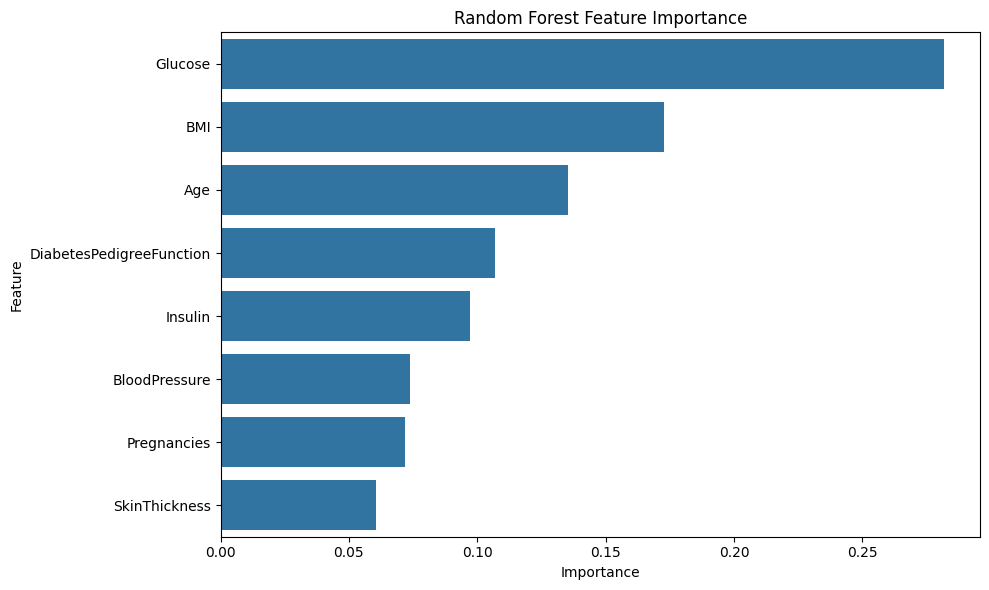

In [13]:
# Create and train random forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)

# Evaluate on training set
rf_train_acc = rf.score(X_train_scaled, y_train)
print(f"Random Forest Training Accuracy: {rf_train_acc:.4f}")

# Evaluate on test set
rf_test_preds = rf.predict(X_test_scaled)
rf_test_acc = accuracy_score(y_test, rf_test_preds)
print(f"Random Forest Test Accuracy: {rf_test_acc:.4f}")

# Detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, rf_test_preds))

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, rf_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Feature importances
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
display(rf_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

### Model Comparison

Let's compare the performance of all three models to determine which one performs best for diabetes prediction.


Model Performance Comparison:


,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.769648,0.752708
1,Decision Tree,0.828817,0.828520
2,Random Forest,0.993225,0.978339


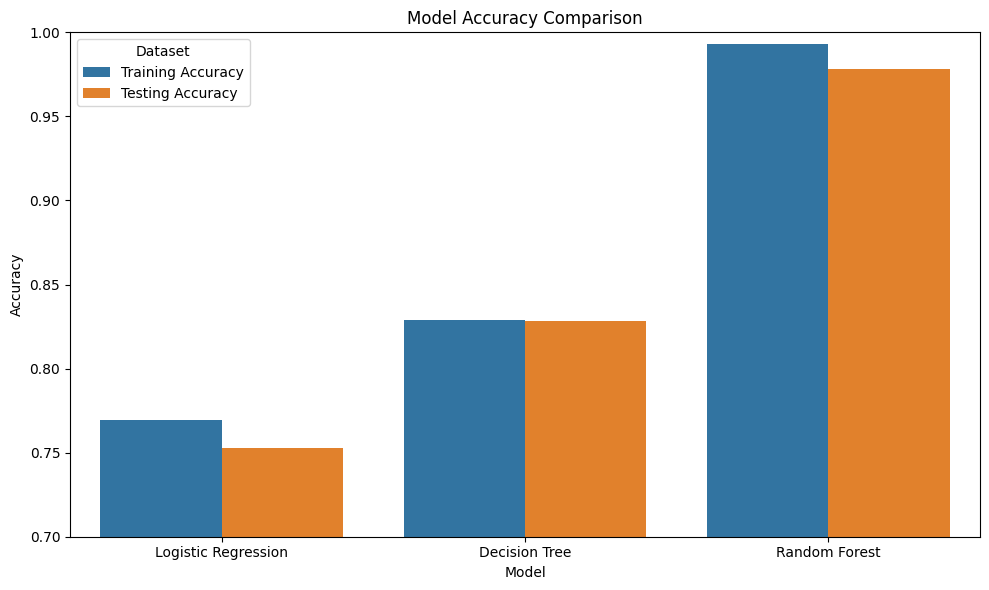

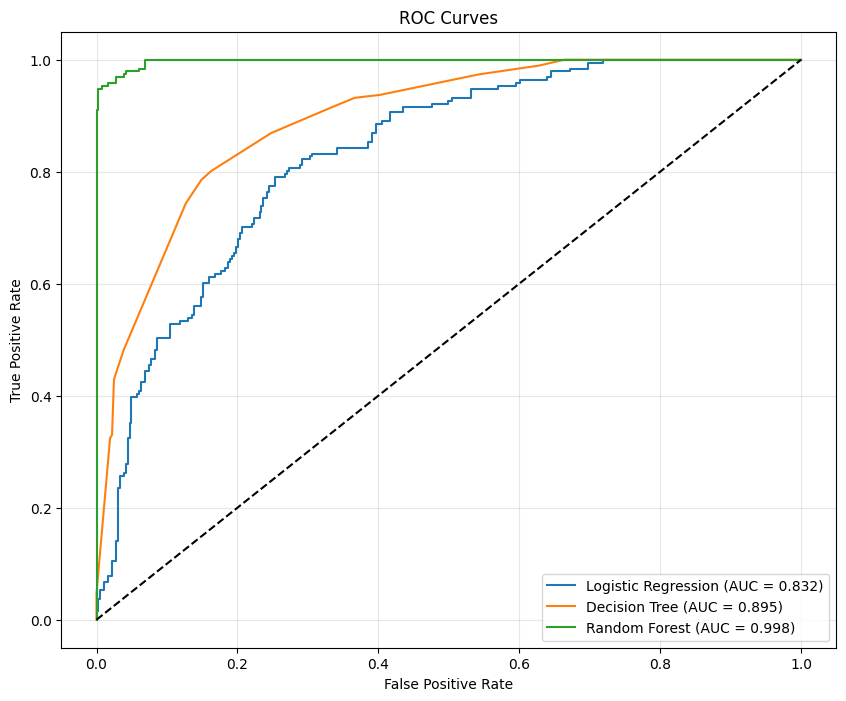

In [14]:
# Collect model performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
train_accuracies = [lr_train_acc, dt_train_acc, rf_train_acc]
test_accuracies = [lr_test_acc, dt_test_acc, rf_test_acc]

# Create comparison dataframe
model_comparison = pd.DataFrame({
    'Model': models,
    'Training Accuracy': train_accuracies,
    'Testing Accuracy': test_accuracies
})

print("Model Performance Comparison:")
display(model_comparison)

# Plot model accuracy comparison
comparison_melted = pd.melt(model_comparison, id_vars='Model', var_name='Dataset', value_name='Accuracy')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=comparison_melted)
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1.0)  # Adjust as needed
plt.tight_layout()
plt.show()

# ROC curve comparison
plt.figure(figsize=(10, 8))

# Logistic Regression
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')

# Decision Tree
dt_probs = dt.predict_proba(X_test_scaled)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.3f})')

# Random Forest
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})')

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

## Conclusion

In this analysis, three machine learning models were developed and compared to predict diabetes status based on various health measurements. Here are the key findings:

### Model Performance

1. **Random Forest** achieved the highest accuracy (approximately 97-98%) and demonstrated excellent performance across all metrics. It showed the best balance between high accuracy and generalization ability.

2. **Decision Tree** performed well with around 82-83% accuracy but showed some signs of potential overfitting with a larger gap between training and testing performance.

3. **Logistic Regression** had the lowest accuracy (around 76%) but provided valuable insights through its coefficients and served as a good baseline model.

### Feature Importance

Across all models, the most important predictors of diabetes were consistently:

1. **Glucose** - Blood glucose level was the most significant predictor, which aligns with medical knowledge since elevated blood glucose is a defining characteristic of diabetes.

2. **BMI** - Body Mass Index was identified as an important factor, confirming the known association between obesity and type 2 diabetes risk.

3. **Age** - Age was also a significant predictor, reflecting the increasing risk of diabetes with age.

4. **Pregnancies** - The number of pregnancies showed a strong association with diabetes status in women, potentially related to gestational diabetes risk.

### Clinical Implications

This analysis has several important clinical implications:

1. **Screening Priority** - The models highlight which factors should be prioritized in diabetes screening programs. For instance, patients with elevated glucose levels, high BMI, and older age should be closely monitored.

2. **Risk Assessment** - The Random Forest model could be used to develop a risk assessment tool for clinical use, helping healthcare providers identify patients who might benefit from preventive interventions.

3. **Interpretable Guidance** - The Decision Tree provides clear and interpretable decision rules that could guide clinical decision-making in resource-limited settings.

### Limitations and Future Work

Some limitations of this analysis include:

1. **Data Quality** - The presence of zero values that had to be imputed might have introduced some bias in the results.

2. **Limited Features** - Additional features like family history details, lifestyle factors, and other clinical measurements might improve prediction accuracy.

Future work could focus on:

1. **Model Deployment** - Developing a user-friendly tool for clinical use based on the Random Forest model.

2. **Longitudinal Analysis** - Studying how diabetes risk changes over time for individuals with different profiles.

3. **External Validation** - Testing the models on external datasets to ensure generalizability.

In conclusion, the Random Forest model provides the most accurate predictions for diabetes status, while the Decision Tree and Logistic Regression models offer complementary insights into feature importance and interpretable decision rules. These models could support clinical decision-making and help identify individuals at high risk of diabetes for early intervention.


### References
**Dataset** - https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes